## Linear Regression Project with Teams

### USA House Price

### Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manupalation
import matplotlib.pyplot as plt  # visulazation tool
import seaborn as sns # visulazation tool
import scipy.stats as stats # statistical tool
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df=df.drop(columns = "Address")
df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


## Data Preparation with EDA and Statistical Analyses
* Visulazations
* Statistical

In [4]:
df.shape

(5000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4995,False,False,False,False,False,False
4996,False,False,False,False,False,False
4997,False,False,False,False,False,False
4998,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [11]:
from scipy.stats import skew

In [12]:
for i in df.drop(columns = "Price").columns:
    print(i, skew(df[i]))

Avg. Area Income -0.03370985856853668
Avg. Area House Age -0.007211708023735578
Avg. Area Number of Rooms -0.040983610381965664
Avg. Area Number of Bedrooms 0.37612751568905145
Area Population 0.05063448536127159


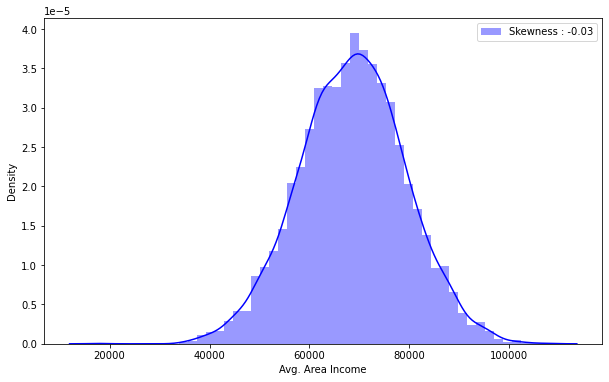

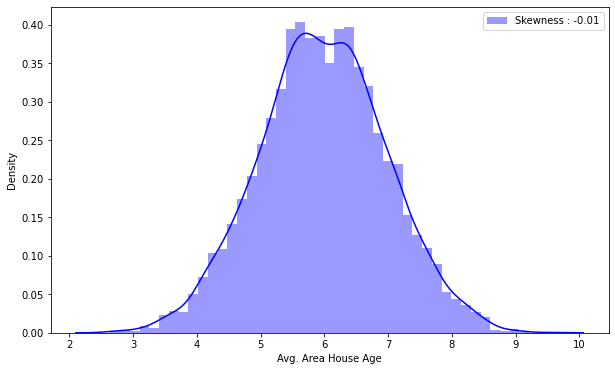

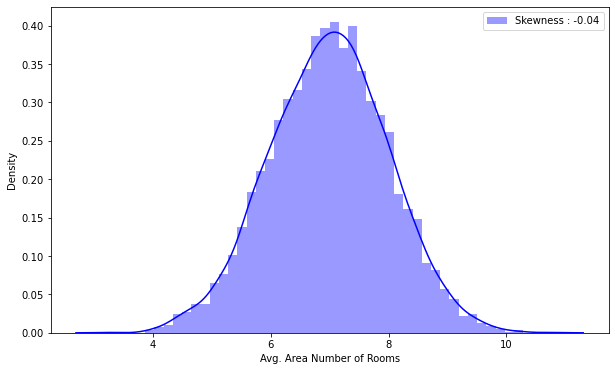

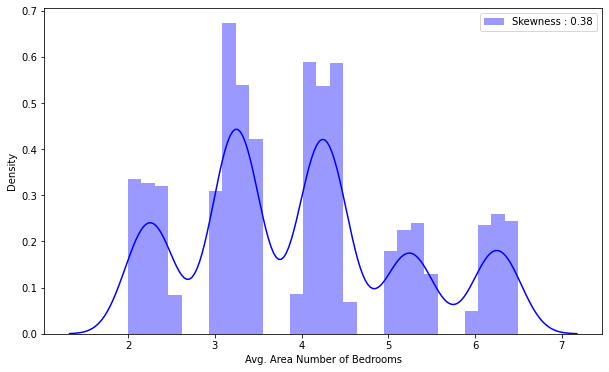

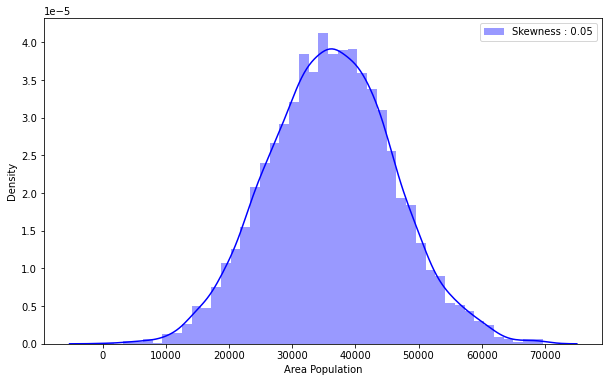

In [13]:
for j in df.drop(columns = "Price").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

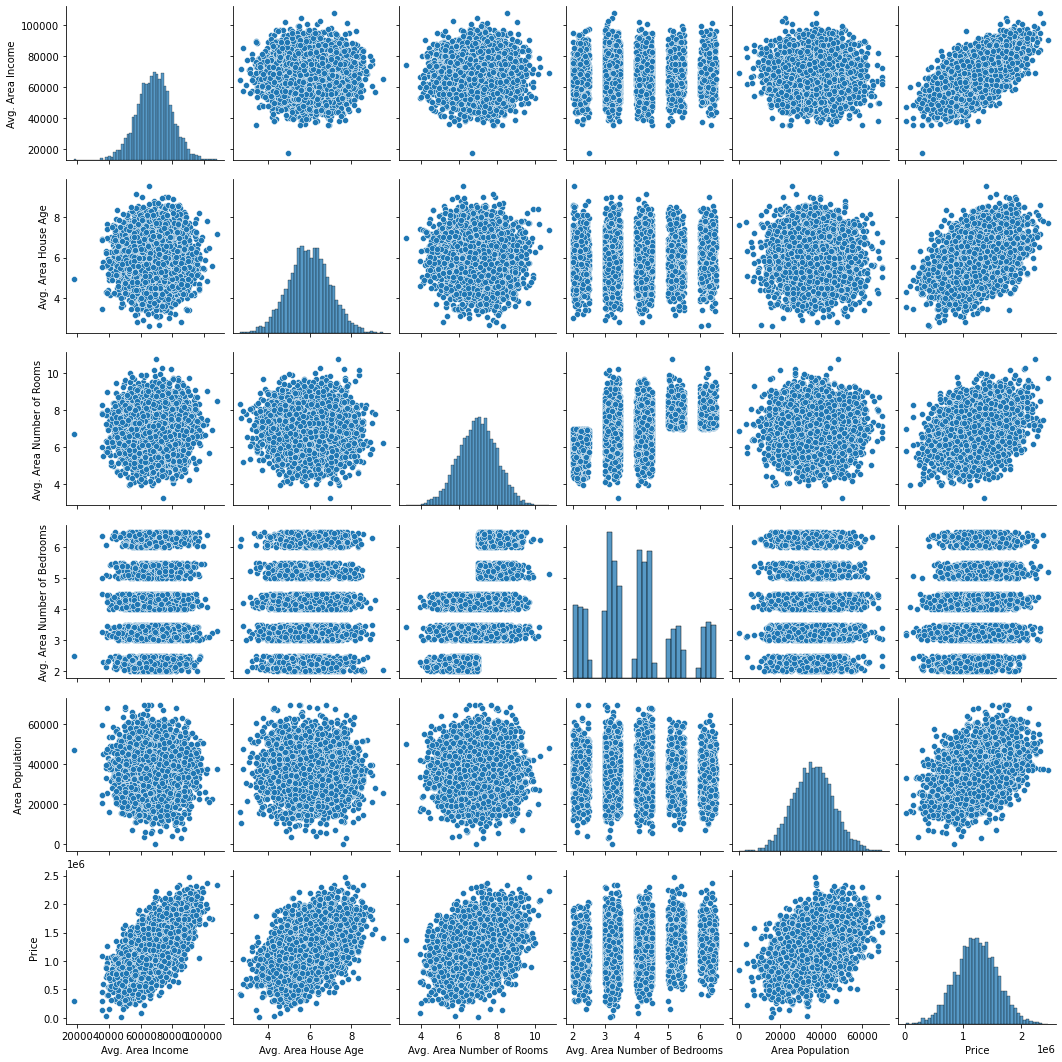

In [14]:
sns.pairplot(df)
plt.show()

## Drop Nonmumerical Columns

In [15]:
df=df.drop(columns="Avg. Area Number of Bedrooms")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


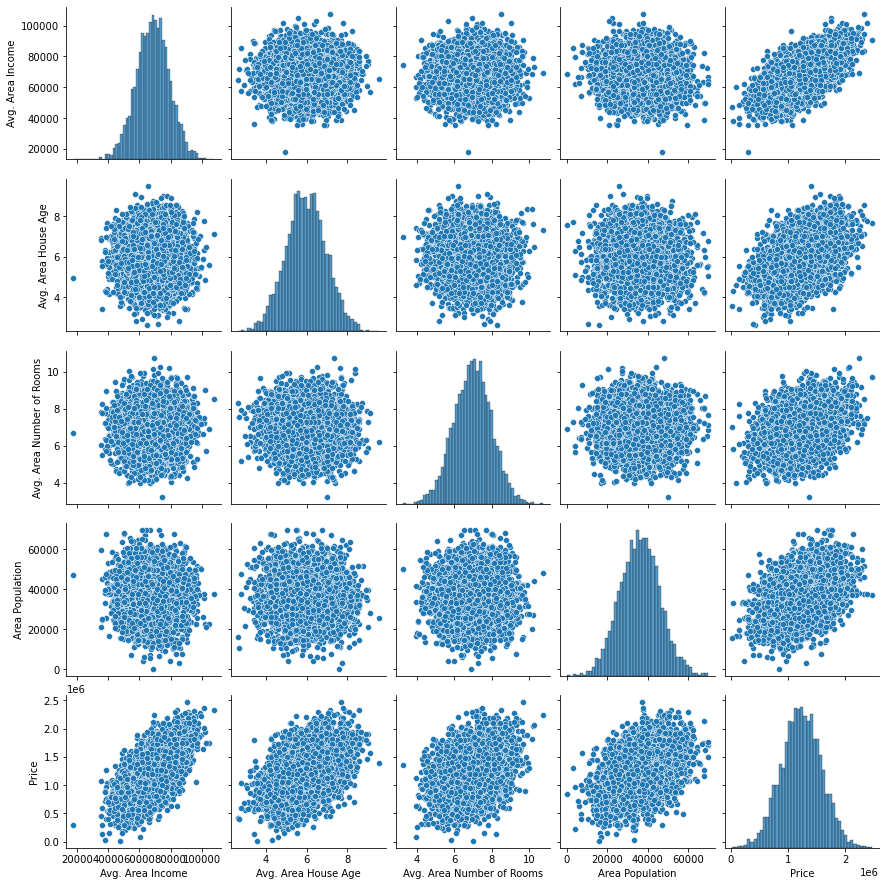

In [16]:
sns.pairplot(df)
plt.show()

## Train - Test Split

In [17]:
!pip install scikit-learn

You should consider upgrading via the '/Users/mustafatatis/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [18]:
!pip install sklearn

You should consider upgrading via the '/Users/mustafatatis/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [19]:
X = df.drop(columns = "Price")

y = df["Price"]

print(X,y)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Area Population  
0        23086.800503  
1        40173.072174  
2        36882.159400  
3        34310.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [22]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
4204,73739.847545,4.689009,8.244523,38988.127975,1.423126e+06
3984,78077.111951,7.164631,6.352985,40737.417188,1.729392e+06
970,76114.159362,6.769699,7.321610,42601.815301,1.558759e+06
1166,90160.690974,3.395759,5.942342,34010.049826,1.273988e+06
512,70005.853621,4.516448,6.470650,40325.174178,1.056994e+06


In [23]:
print("X Train Features Shape: {}\nY Train Features Shape: {}\nX Test Features Shape: {}\nX Train Features Shape: {}".format(
            X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train Features Shape: (4000, 4)
Y Train Features Shape: (4000,)
X Test Features Shape: (1000, 4)
X Train Features Shape: (1000,)


## Model Fitting and Compare Actual and Predicted Labels

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.intercept_

-2635543.3735942217

In [28]:
model.coef_ 

array([2.16597504e+01, 1.64702184e+05, 1.21003907e+05, 1.52655056e+01])

In [29]:
y_pred = model.predict(X_test)        #  y_pred   /    y_head
y_pred

array([1309580.0144521 , 1238947.74743864, 1247877.27618839,
       1229480.00658321, 1066188.59004742, 1546651.09892043,
       1096610.43095606,  831309.49091879,  786237.95681654,
       1470839.1936539 ,  670268.85741833, 1610862.27677785,
       1003612.40008669, 1800294.71711701, 1289322.25471671,
       1087252.81917932, 1420934.24001302, 1082555.97186674,
        806562.56363145,  931460.84094018, 1132786.97334416,
        917636.52953409, 1491741.04500035, 1282982.93985377,
       1583965.2065828 , 1129546.34515578, 1089417.43398621,
        973705.375173  ,  923631.90908173, 1735427.11769168,
       1290311.7903332 , 1624498.29544763, 1432239.40615566,
       1229986.39367559, 1489404.5746828 , 1719753.64330694,
       1542196.46954668,  771253.56679444, 1761700.84324041,
       1174384.95370461, 1555383.90141586,  895615.36377515,
       1372580.14404701,  846603.0820272 , 1200275.5745502 ,
       1132575.89854706, 1358811.57325786, 1453330.89754492,
       1569227.61394299,

In [30]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [31]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
1501,1.339096e+06,1.309580e+06,29516.062793
2586,1.251794e+06,1.238948e+06,12846.431398
2653,1.340095e+06,1.247877e+06,92217.690017
1055,1.431508e+06,1.229480e+06,202027.616845
705,1.042374e+06,1.066189e+06,-23815.065951
...,...,...,...
4711,1.107031e+06,1.039698e+06,67333.351452
2313,1.405505e+06,1.321431e+06,84073.953364
3214,1.924156e+06,1.866892e+06,57263.151091
2732,1.571254e+06,1.665758e+06,-94504.830836


In [32]:
result_sample = comparing.head(30)
result_sample

,Actual,pred,residual
1501,1.339096e+06,1.309580e+06,29516.062793
2586,1.251794e+06,1.238948e+06,12846.431398
2653,1.340095e+06,1.247877e+06,92217.690017
1055,1.431508e+06,1.229480e+06,202027.616845
705,1.042374e+06,1.066189e+06,-23815.065951
106,1.555321e+06,1.546651e+06,8669.401081
589,1.250882e+06,1.096610e+06,154271.860801
2468,1.039381e+06,8.313095e+05,208071.231561
2413,8.324752e+05,7.862380e+05,46237.232199
1600,1.420648e+06,1.470839e+06,-50190.912784


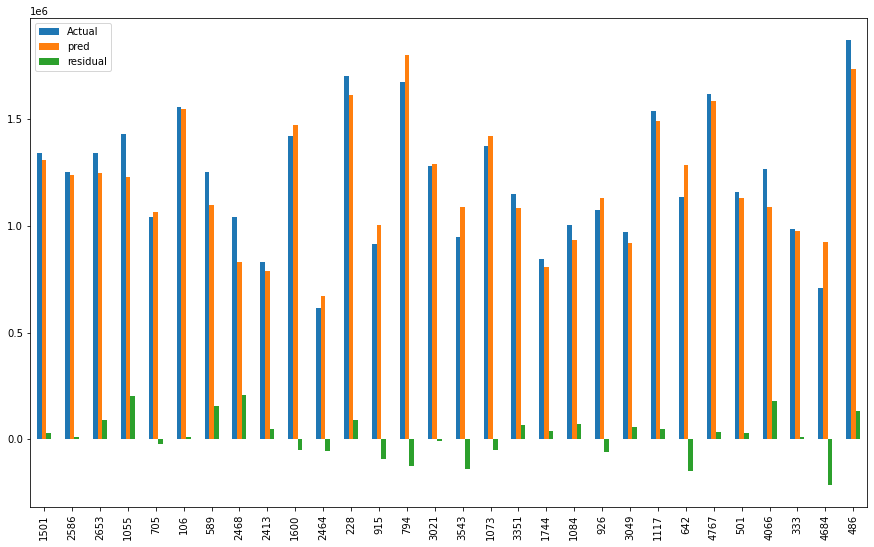

In [33]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show()

## Error Metrics

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.9181214278738072

In [41]:
mae = mean_absolute_error(y_test, y_pred)

mae

80857.78944046432

In [42]:
mse = mean_squared_error(y_test, y_pred)

mse

10073721633.8728

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

100367.9313021485

## Evaluation Model

In [35]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")                        #### onemli

In [36]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9181214278738072
MAE 		: 80857.78944046432
MSE 		: 10073721633.8728
RMSE 		: 100367.9313021485


In [37]:
y_train_pred = model.predict(X_train)

In [38]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9179227041506954
MAE 		: 81489.37808060981
MSE 		: 10263326295.803938
RMSE 		: 101308.07616278151


## Is data suitable for linear regression?

In [44]:
residuals = y_test - y_pred

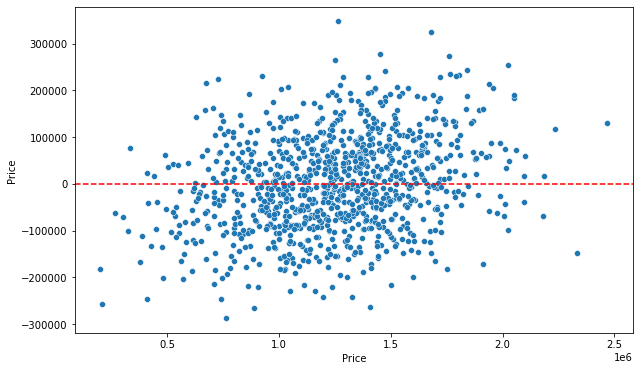

In [45]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

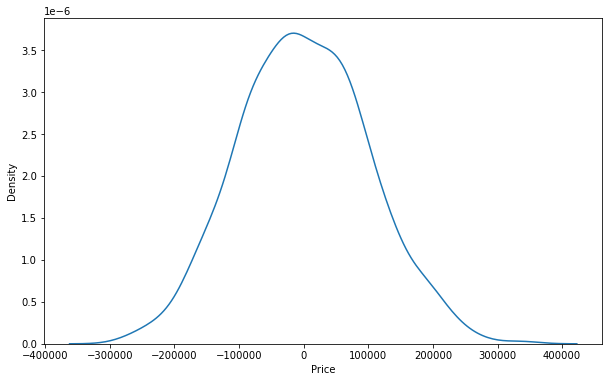

In [46]:
sns.kdeplot(residuals)
plt.show()

In [47]:
skew(residuals)

0.10340941141702792

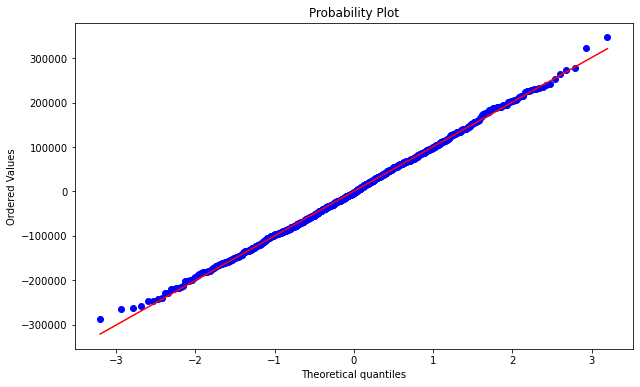

In [48]:
stats.probplot(residuals, dist= "norm", plot= plt);